Training using Word Embedding and Using LSTM Layers 

In [0]:
from keras.layers import Embedding
from keras.datasets import imdb
from keras import preprocessing


In [5]:
max_features = 10000
maxlen = 200
batch_size = 64

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('input_train shape:', x_train.shape)
print('input_test shape:', x_test.shape)

25000 train sequences
25000 test sequences
input_train shape: (25000, 200)
input_test shape: (25000, 200)


In [6]:
x_train


array([[   5,   25,  100, ...,   19,  178,   32],
       [   0,    0,    0, ...,   16,  145,   95],
       [   0,    0,    0, ...,    7,  129,  113],
       ...,
       [   0,    0,    0, ...,    4, 3586,    2],
       [   0,    0,    0, ...,   12,    9,   23],
       [   0,    0,    0, ...,  204,  131,    9]], dtype=int32)

In [7]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout

model = Sequential()
model.add(Embedding(10000, 64, input_length=maxlen))

model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_split=0.2)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 64)           640000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 12800)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                409632    
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,049,665
Trainable params: 1,049,665
Non-trainable params: 0
___________

Adding learing rate

In [11]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout
from keras.optimizers import adam

model = Sequential()
model.add(Embedding(max_features, 64, input_length=maxlen))

model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

train_history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=256,
                    validation_split=0.2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 200, 64)           640000    
_________________________________________________________________
flatten_3 (Flatten)          (None, 12800)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 32)                409632    
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 33        
Total params: 1,049,665
Trainable params: 1,049,665
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 4s 214us/step - loss: 0.6

Test Loss:  0.30974822925567624
Test Accuracy 0.8712
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


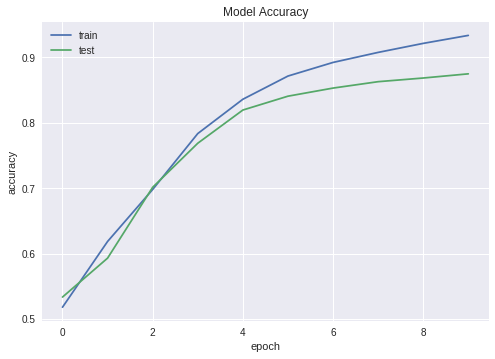

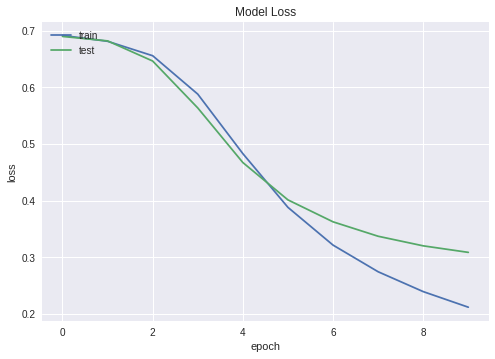

In [12]:
import matplotlib.pyplot as plt
#print(metrics.accuracy_score(Y_test, Y_predicted))

score = model.evaluate(x_test, y_test, verbose=3)
print('Test Loss: ', score[0])
print('Test Accuracy', score[1])


# list all data in history
print(train_history.history.keys())
# summarize history for accuracy
plt.plot(train_history.history['acc'])
plt.plot(train_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [13]:
#SImple RNN model 
from keras.layers import Dense, SimpleRNN

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=adam(0.0001), loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 13s 632us/step - loss: 0.6946 - acc: 0.5116 - val_loss: 0.6919 - val_acc: 0.5196
Epoch 2/10
20000/20000 [==============================] - 12s 607us/step - loss: 0.6795 - acc: 0.5752 - val_loss: 0.6876 - val_acc: 0.5366
Epoch 3/10
20000/20000 [==============================] - 12s 607us/step - loss: 0.6026 - acc: 0.7038 - val_loss: 0.5313 - val_acc: 0.7618
Epoch 4/10
20000/20000 [==============================] - 12s 611us/step - loss: 0.4479 - acc: 0.8135 - val_loss: 0.4405 - val_acc: 0.8190
Epoch 5/10
20000/20000 [==============================] - 12s 618us/step - loss: 0.3451 - acc: 0.8672 - val_loss: 0.3889 - val_acc: 0.8408
Epoch 6/10
20000/20000 [==============================] - 12s 623us/step - loss: 0.2835 - acc: 0.8958 - val_loss: 0.3699 - val_acc: 0.8464
Epoch 7/10
20000/20000 [==============================] - 12s 621us/step - loss: 0.2360 - acc: 0.9178 - val_loss: 0.3

Test Loss:  0.365453900680542
Test Accuracy 0.84724
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


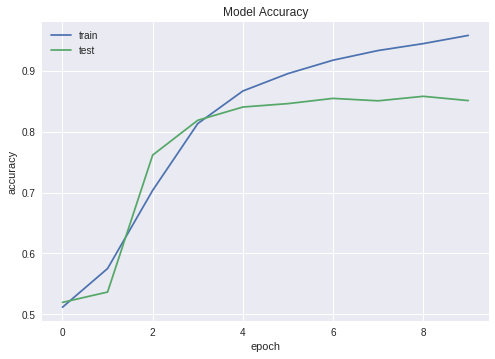

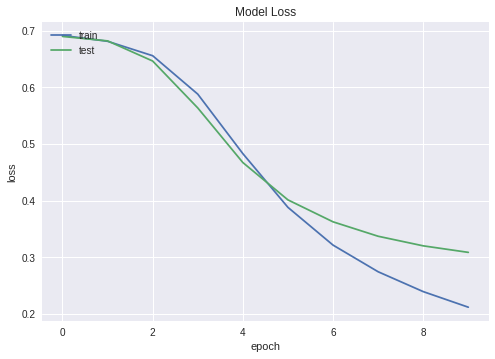

In [14]:
import matplotlib.pyplot as plt
#print(metrics.accuracy_score(Y_test, Y_predicted))

score = model.evaluate(x_test, y_test, verbose=3)
print('Test Loss: ', score[0])
print('Test Accuracy', score[1])


# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [0]:
y_pred = model.predict_classes(x_test)

In [16]:
y_pred

array([[0],
       [1],
       [1],
       ...,
       [0],
       [1],
       [1]], dtype=int32)

In [17]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[10764,  1736],
       [ 2083, 10417]])

In [19]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85     12500
           1       0.86      0.83      0.85     12500

   micro avg       0.85      0.85      0.85     25000
   macro avg       0.85      0.85      0.85     25000
weighted avg       0.85      0.85      0.85     25000



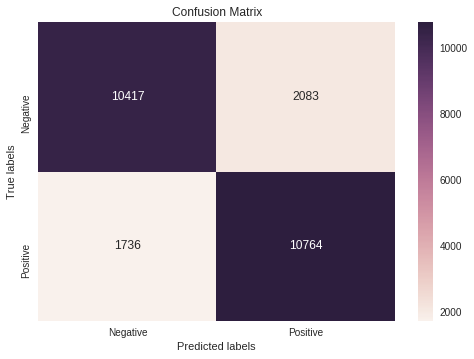

In [29]:
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Negative', 'Positive']); ax.yaxis.set_ticklabels(['Positive', 'Negative']);

**STACKED** **LSTM** 

In [35]:
from keras.layers import LSTM

model_lstm = Sequential()
model_lstm.add(Embedding(max_features, 64))
model_lstm.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
#model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(32, dropout=0.2, recurrent_dropout=0.2))

model_lstm.add(Dense(1, activation='sigmoid'))

model_lstm.compile(optimizer=adam(lr=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model_lstm.fit(x_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 157s 8ms/step - loss: 0.6425 - acc: 0.6336 - val_loss: 0.4882 - val_acc: 0.7878
Epoch 2/10
20000/20000 [==============================] - 155s 8ms/step - loss: 0.4454 - acc: 0.8076 - val_loss: 0.4223 - val_acc: 0.8152
Epoch 3/10
20000/20000 [==============================] - 154s 8ms/step - loss: 0.3710 - acc: 0.8507 - val_loss: 0.3842 - val_acc: 0.8356
Epoch 4/10
20000/20000 [==============================] - 157s 8ms/step - loss: 0.3313 - acc: 0.8678 - val_loss: 0.3746 - val_acc: 0.8382
Epoch 5/10
20000/20000 [==============================] - 156s 8ms/step - loss: 0.3085 - acc: 0.8803 - val_loss: 0.3744 - val_acc: 0.8400
Epoch 6/10
20000/20000 [==============================] - 156s 8ms/step - loss: 0.2877 - acc: 0.8913 - val_loss: 0.3756 - val_acc: 0.8412
Epoch 7/10
20000/20000 [==============================] - 155s 8ms/step - loss: 0.2745 - acc: 0.8944 - val_loss: 0.3813 - v

Test Loss:  0.41616990515708924
Test Accuracy 0.83632
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


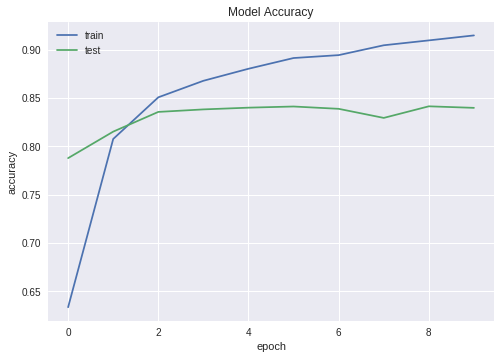

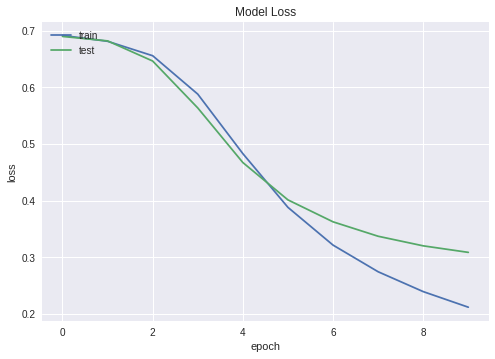

In [36]:
import matplotlib.pyplot as plt
#print(metrics.accuracy_score(Y_test, Y_predicted))

score = model_lstm.evaluate(x_test, y_test, verbose=3)
print('Test Loss: ', score[0])
print('Test Accuracy', score[1])


# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [37]:
y_pred_lstm = model.predict_classes(x_test)
y_pred_lstm 

array([[0],
       [1],
       [1],
       ...,
       [0],
       [1],
       [1]], dtype=int32)

In [38]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred_lstm)

array([[10764,  1736],
       [ 2083, 10417]])

In [39]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_lstm))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85     12500
           1       0.86      0.83      0.85     12500

   micro avg       0.85      0.85      0.85     25000
   macro avg       0.85      0.85      0.85     25000
weighted avg       0.85      0.85      0.85     25000



[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative')]

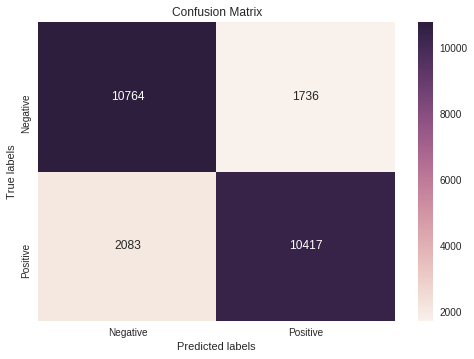

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

ax= plt.subplot()
#cm = classification_report(y_test, y_pred_lstm)
sns.heatmap(confusion_matrix(y_test, y_pred_lstm), annot=True, ax = ax, fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
ax.yaxis.set_ticklabels(['Positive', 'Negative'])

**BIDIRECTIONAL** **GRU**

In [0]:
from keras.layers import SpatialDropout1D, Bidirectional
from keras.layers import Dense,Dropout,Embedding,LSTM,Conv1D,GlobalMaxPooling1D,Flatten,MaxPooling1D,GRU,SpatialDropout1D,Bidirectional

In [49]:
max_features = 10000
maxlen = 200
batch_size = 64

model_GRU = Sequential()

model_GRU.add(Embedding(max_features, 64, input_length=maxlen))
model_GRU.add(SpatialDropout1D(0.25))
model_GRU.add(Bidirectional(GRU(100)))
model_GRU.add(Dropout(0.25))

model_GRU.add(Dense(1, activation='sigmoid'))
model_GRU.compile(loss='binary_crossentropy', optimizer=adam(lr=0.0004), metrics=['accuracy'])
model_GRU.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 200, 64)           640000    
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 200, 64)           0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 200)               99000     
_________________________________________________________________
dropout_6 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 201       
Total params: 739,201
Trainable params: 739,201
Non-trainable params: 0
_________________________________________________________________


In [50]:
history = model_GRU.fit(x_train, y_train,
                    epochs=10,
                    batch_size=batch_size,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 218s 11ms/step - loss: 0.5243 - acc: 0.7125 - val_loss: 0.3875 - val_acc: 0.8406
Epoch 2/10
20000/20000 [==============================] - 214s 11ms/step - loss: 0.2774 - acc: 0.8893 - val_loss: 0.3180 - val_acc: 0.8666
Epoch 3/10
20000/20000 [==============================] - 214s 11ms/step - loss: 0.2103 - acc: 0.9201 - val_loss: 0.3750 - val_acc: 0.8576
Epoch 4/10
20000/20000 [==============================] - 214s 11ms/step - loss: 0.1672 - acc: 0.9388 - val_loss: 0.3235 - val_acc: 0.8660
Epoch 5/10
20000/20000 [==============================] - 213s 11ms/step - loss: 0.1469 - acc: 0.9470 - val_loss: 0.3795 - val_acc: 0.8728
Epoch 6/10
20000/20000 [==============================] - 213s 11ms/step - loss: 0.1214 - acc: 0.9572 - val_loss: 0.3630 - val_acc: 0.8648
Epoch 7/10
20000/20000 [==============================] - 214s 11ms/step - loss: 0.1010 - acc: 0.9661 - val_loss: 0.4

Test Loss:  0.5015635720038414
Test Accuracy 0.847
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


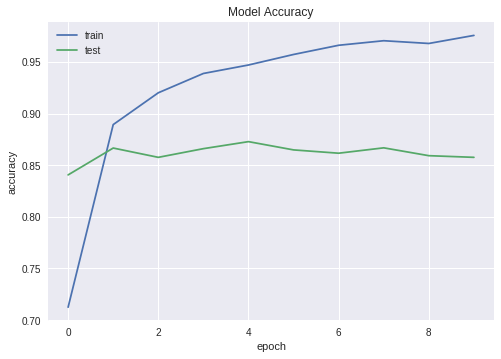

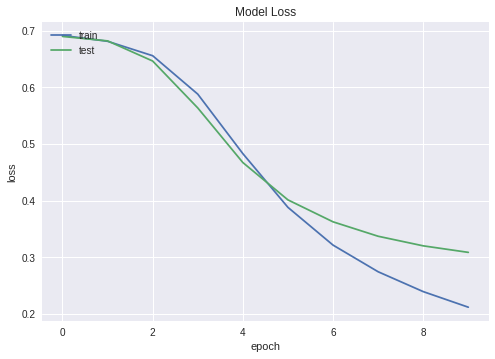

In [53]:
import matplotlib.pyplot as plt
#print(metrics.accuracy_score(Y_test, Y_predicted))

score = model_GRU.evaluate(x_test, y_test, verbose=3)
print('Test Loss: ', score[0])
print('Test Accuracy', score[1])


# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [54]:
y_pred_GRU = model_GRU.predict_classes(x_test)
y_pred_GRU 

array([[0],
       [1],
       [1],
       ...,
       [0],
       [0],
       [1]], dtype=int32)

In [56]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred_GRU))

0.847


In [57]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred_GRU)

array([[10569,  1931],
       [ 1894, 10606]])

In [58]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_GRU))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85     12500
           1       0.85      0.85      0.85     12500

   micro avg       0.85      0.85      0.85     25000
   macro avg       0.85      0.85      0.85     25000
weighted avg       0.85      0.85      0.85     25000



[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative')]

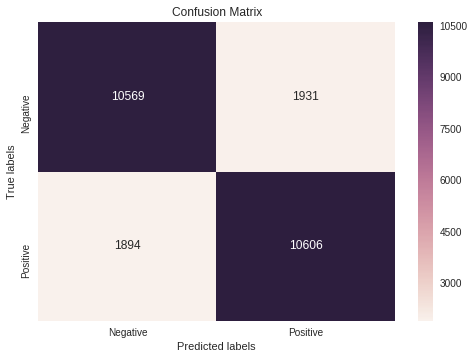

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_pred_GRU), annot=True, ax = ax, fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
ax.yaxis.set_ticklabels(['Positive', 'Negative'])